In [10]:
import os
import numpy as np
import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

import tensorflow_datasets as tfds

# Load the CIFAR-100 dataset
(train_data, val_data, test_data), info = tfds.load('cifar100', split=['train[:80%]', 'train[80%:]', 'test'], with_info=True)

# Define the preprocessing function
def preprocess(example):
    image = tf.cast(example['image'], tf.float32) / 255.0
    label = example['coarse_label']
    return image, label

# Apply the preprocessing function to the datasets
train_data = train_data.map(preprocess)
val_data = val_data.map(preprocess)
test_data = test_data.map(preprocess)

# Shuffle and batch the training data
train_data = train_data.shuffle(10000).batch(32)

# Batch the validation and test data
val_data = val_data.batch(32)
test_data = test_data.batch(32)

# Print some information about the dataset
print('Number of training examples:', info.splits['train'].num_examples)
print('Number of validation examples:', info.splits['train[:80%]'].num_examples)
print('Number of test examples:', info.splits['test'].num_examples)
print('Number of classes:', info.features['coarse_label'].num_classes)

Number of training examples: 50000
Number of validation examples: 40000
Number of test examples: 10000
Number of classes: 20


In [11]:
def build_model(dropout_rate=0.2):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(100, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # Train the model
    history = model.fit(train_data, epochs=10, validation_data=val_data)

    # Save the model
    model.save('models/CNNCIFAR100.h5')
    return model

if not os.path.exists('models/CNNCIFAR100.h5'):
    model=build_model()
else:
    model=tf.keras.models.load_model('models/CNNCIFAR100.h5')

In [12]:
#test on unseen data
test_loss, test_acc = model.evaluate(test_data) #since we specified metrics=[accuracy], evaluate() returns test_acc too.
                                                #dont pass labels since test_data contains them as it is a dataset
print('Test loss:', test_loss)
print('Test accuracy:', test_acc) 

313/313 [==============================] - 4s 11ms/step - loss: 9.0060 - accuracy: 0.0000e+00
Test loss: 9.00602912902832
Test accuracy: 0.0


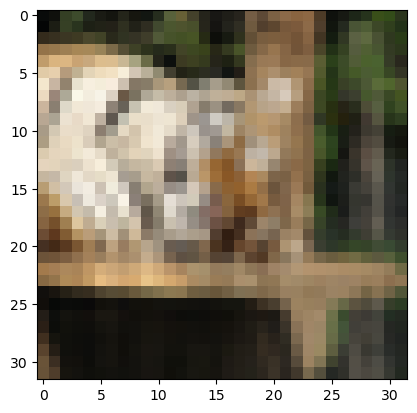

12 20
tf.Tensor(
[[[0.03529412 0.04313726 0.03921569]
  [0.05882353 0.0627451  0.04705882]
  [0.20392157 0.24705882 0.14117648]
  ...
  [0.22352941 0.30980393 0.09803922]
  [0.2        0.29803923 0.09803922]
  [0.16862746 0.20784314 0.11372549]]

 [[0.01568628 0.01960784 0.01960784]
  [0.10980392 0.11372549 0.07843138]
  [0.21176471 0.2509804  0.14509805]
  ...
  [0.23529412 0.2784314  0.15294118]
  [0.1882353  0.24705882 0.11372549]
  [0.13725491 0.19607843 0.09803922]]

 [[0.20392157 0.16862746 0.10980392]
  [0.21568628 0.1882353  0.1254902 ]
  [0.23137255 0.21176471 0.13725491]
  ...
  [1.         1.         1.        ]
  [0.18431373 0.21960784 0.12156863]
  [0.16470589 0.23529412 0.09411765]]

 ...

 [[0.34901962 0.2627451  0.1764706 ]
  [0.14117648 0.11372549 0.08235294]
  [0.0627451  0.0627451  0.04705882]
  ...
  [0.24313726 0.24705882 0.22352941]
  [0.16078432 0.17254902 0.16078432]
  [0.13725491 0.14901961 0.13333334]]

 [[0.4117647  0.3254902  0.21960784]
  [0.23137255 0.1803

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

In [13]:
import numpy as np
import random
import matplotlib.pyplot as plt
# Select a random image from the test set
#test_data_np = tfds.as_numpy(test_data) #tfds.load returns a BatchDataset object which is not subscriptable. instead convert it to a numpy array then we can subscript to choose a random image
#img = test_data_np[np.random.randint(len(test_data_np))]
img = test_data.shuffle(1000).take(1)
for element in img.as_numpy_iterator():
    #img=element[0][0]
    img=element[0][0]
    #label=element[1]
#for i,l in img:
#    i=img
#print(img)
#img=img.as_numpy()
#img = next(iter(test_data))['image']
#img = tf.cast(img, tf.float32) / 255.0
#img=img.reshape((32, 32, 3))
#print(img)
#plt.title(tfds.as_numpy(label))
plt.imshow(img)
plt.show()
# Define the target class (toaster)
target_class = 95

# Generate the adversarial patch
patch_size = 20
#index = tf.constant([[6, 6], [26, 6], [6, 26], [26, 26]])
#indices = tf.stack(tf.meshgrid(tf.range(6, 26), tf.range(6, 26), indexing='ij'), axis=-1) #6 is x,y start, 26 is x,y end (size of patch). 
#center = tf.constant([6, 6])
#indices = center + tf.stack(tf.meshgrid(tf.range(20), tf.range(20), indexing='ij'), axis=-1)
#x_coords, y_coords = tf.meshgrid(tf.range(6, 26), tf.range(6, 26), indexing='ij')
#coords = tf.stack([x_coords, y_coords], axis=-1)
#indices = tf.expand_dims(coords, axis=-2)
#indices = tf.tile(indices, [1, 1, 3, 1])
#indices = tf.stack(tf.meshgrid(tf.range(6, 26), tf.range(6, 26)), axis=-1)
#indices = tf.concat([indices, tf.zeros((20, 20, 1), dtype=tf.int32)], axis=-1)
# Calculate the starting indices for placing U in the center of T
#T = tf.ones((32, 32, 3))
#U = tf.ones((20, 20, 3))
#start_index = (T.shape[0] - U.shape[0]) // 2
#end_index = start_index + U.shape[0]

# Create the indices to update in T
#indices = tf.stack(tf.meshgrid(tf.range(start_index, end_index), tf.range(start_index, end_index), indexing='ij'), axis=-1)
#center_x = (T.shape[0] - U.shape[0]) // 2
#center_y = (T.shape[1] - U.shape[1]) // 2
#x_indices = tf.range(center_x, center_x + U.shape[0])
#y_indices = tf.range(center_y, center_y + U.shape[1])
#z_indices = tf.range(0, U.shape[2])
#indices = tf.stack(tf.meshgrid(x_indices, y_indices, z_indices, indexing='ij'), axis=-1)
#indices=tf.constant([[[0:20,]]])

#print(indices)
patch_value = np.ones((patch_size, patch_size, 3))
#patch_value = tf.ones((patch_size, patch_size, 3))
#indices = tf.constant([[i, j] for i in range(patch_value[0], patch_value[0]+patch_size) for j in range(patch_value[1], patch_value[1]+patch_size)])
learning_rate = 100000000000000
num_iterations = 100
patch_value=tf.convert_to_tensor(patch_value, dtype=tf.float32)
ran_x=random.randint(11,20)
ran_y=random.randint(11,20)
def apply_patch(img,patch,x,y):
    #apply patch to img with center x,y
    #find out how many rows are above the patch and columns to the left of the patch:
    #center can only be between 12,12 and 21,21
    #get rows above patch
    #get rows inline with patch
    #get rows below patch
    #concatenate all downwards
    print(x,y)
    above=tf.concat([img[:x-10,:y-10,:],img[x-10:,:y-10,:]],axis=0)
    inl=tf.concat([img[:x-10,y-10:y+10,:],patch,img[x+10:,y-10:y+10,:]],axis=0)
    below=tf.concat([img[:x-10,y+10:,:],img[x-10:,y+10:,:]],axis=0)
    patched_image=tf.concat([above,inl,below],axis=1)
    #patched_image=tf.concat([img_patch[:x-10,:,:],img_patch[x-10:,:y-10,:]],axis=0)
    #patched_image=tf.concat([patched_image,patch_value],axis=1)
    #patched_image=tf.concat([patched_image,img_patch[x+10:,y-10:y,:]],axis=1)
    #patched_image=tf.concat([patched_image,img_patch[x-10:,y+10:,:]],axis=1)
    return patched_image

for i in range(num_iterations):
    with tf.GradientTape() as tape:
        tape.watch(patch_value)
        img_patch = np.copy(img)
        #patch_value = patch_value.numpy()
        img_patch = tf.convert_to_tensor(img_patch, dtype=tf.float32)
        #img_patch[0:patch_size, 0:patch_size, :] = patch_value
        #print(patch_value)
        #mask_patch=tf.reshape(patch_value,(32,32,3))
        #boolean_mask_patch=tf.equal(mask_patch, 1)
        #img_patch=tf.where(boolean_mask_patch,mask_patch,img_patch)
        # Replace the top left 20x20 region with zeros
        #patched_image=tf.concat([patch_value,img_patch[:20,20:,:]],axis=1)
        #patched_image=tf.concat([patched_image,img_patch[20:,:,:]],axis=0)
        patched_image=apply_patch(img_patch,patch_value,ran_x,ran_y)
        #img_patch = tf.tensor_scatter_nd_update(img_patch, indices, patch_value)
        #print(patch_value)
        print(patched_image)
        #plt.imshow(patched_image.numpy())
        #plt.show()
        #print(img_patch)
        predictions = model(patched_image[np.newaxis, ...])
        #print(predictions)
        loss = -predictions[0][target_class]
        #print(loss)
        #print(patch_value)
        #tape.watch(patch_value)
    gradients = tape.gradient(loss, patch_value)
    #print(gradients)
    #print(patch_value - learning_rate * gradients)
    patch_value = patch_value - learning_rate * gradients
    #print(patch_value)
    patch_value = tf.clip_by_value(patch_value, 0, 1)

# Apply the adversarial patch to the image
img_patch = np.copy(img)
img_patch = tf.convert_to_tensor(img_patch, dtype=tf.float32)
patched_image=apply_patch(img_patch,patch_value,ran_x,ran_y)
#img_patch[0:patch_size, 0:patch_size, :] = patch_value
#img_patch = tf.tensor_scatter_nd_update(img_patch, indices, patch_value)

plt.imshow(patched_image.numpy())
plt.show()

# Check the model's prediction on the original image
prediction_orig = model.predict(img[np.newaxis, ...])
print('Original prediction:', np.argmax(prediction_orig))

# Check the model's prediction on the image with the adversarial patch
prediction_patch = model.predict(patched_image[np.newaxis, ...])
print('Prediction with patch:', np.argmax(prediction_patch))